In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [180]:
file='C:/Users/DELL/Desktop/New folder/Iris.csv'
df=pd.read_csv(file)

In [181]:
x=df[['SepalLengthCm','SepalWidthCm']]
y=df['Species']

In [182]:
df.head()
df.shape

(150, 6)

In [183]:
df_setosa=df.loc[df['Species']=='Iris-setosa']

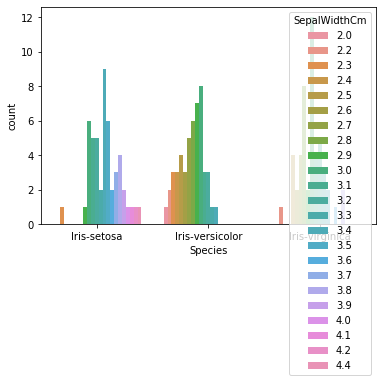

In [184]:
sns.countplot(x="Species",hue='SepalWidthCm',data=df)

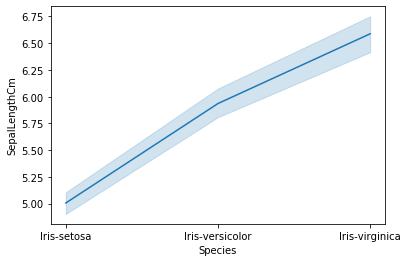

In [185]:
sns.lineplot(x="Species",y="SepalLengthCm",data=df)
plt.show()

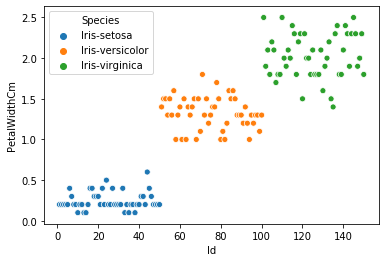

In [186]:
sns.scatterplot(x="Id",y="PetalWidthCm",hue="Species",data=df)

Text(0.5, 0, 'Iris-versicolor')

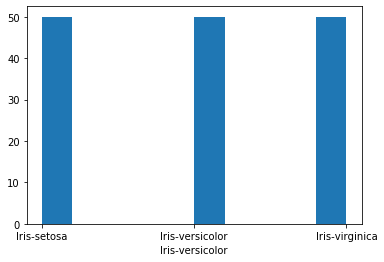

In [187]:
plt.hist(x="Species",data=df)
plt.xlabel("Irissetosa")
plt.xlabel("Iris-versicolor")

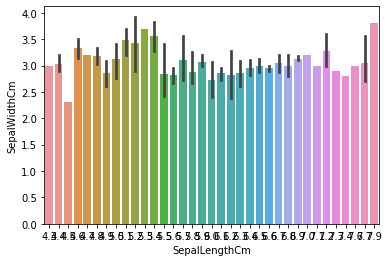

In [188]:
sns.barplot(x="SepalLengthCm",y="SepalWidthCm",data=df)

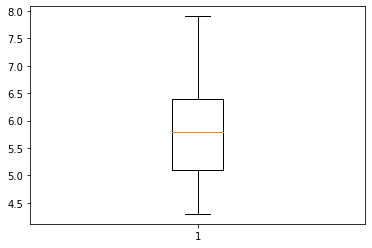

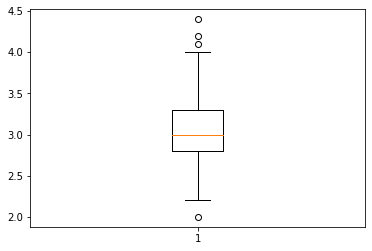

In [189]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([df['SepalLengthCm']])
plt.figure(2)
plt.boxplot([df['SepalWidthCm']])
plt.show()

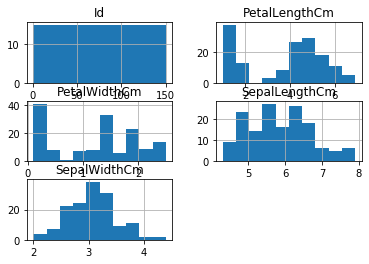

In [190]:
df.hist()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213CB117248>,
      dtype=object)

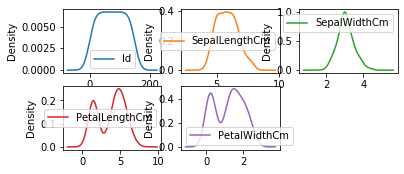

In [191]:
df.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

Id                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
SepalLengthCm    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
SepalWidthCm      AxesSubplot(0.44569,0.536818;0.133621x0.343182)
PetalLengthCm    AxesSubplot(0.606034,0.536818;0.133621x0.343182)
PetalWidthCm     AxesSubplot(0.766379,0.536818;0.133621x0.343182)
dtype: object

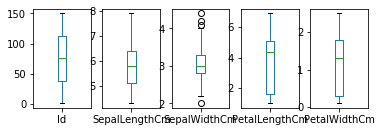

In [192]:
df.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

In [193]:
#Correlation 
corr_mat = df.corr()
print(corr_mat)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


In [194]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [195]:
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [196]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [197]:
test_y.head()

62     Iris-versicolor
139     Iris-virginica
94     Iris-versicolor
56     Iris-versicolor
68     Iris-versicolor
Name: Species, dtype: object

In [198]:
test_y.head()

62     Iris-versicolor
139     Iris-virginica
94     Iris-versicolor
56     Iris-versicolor
68     Iris-versicolor
Name: Species, dtype: object

In [199]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9473684210526315


In [200]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)

Confusion matrix: 
 [[12  0  0]
 [ 0 11  1]
 [ 0  1 13]]


In [201]:
count =  df.Species.value_counts()
print(count)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [202]:
lab = df.Species.unique().tolist()
lab

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

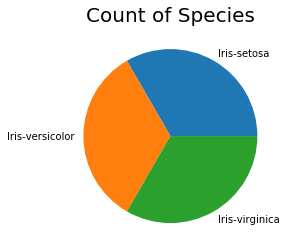

In [203]:
plt.pie(count,labels=lab)
plt.title("Count of Species",fontsize=20)
plt.show()

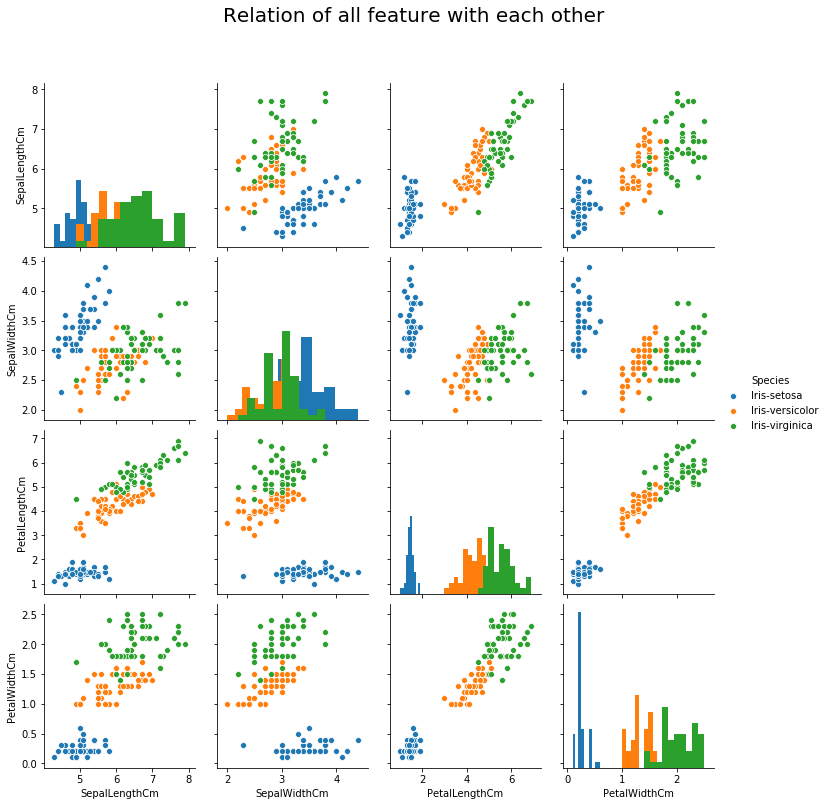

In [204]:
df1 = df.drop("Id",axis=1)
plot=sns.pairplot(df1,hue="Species",diag_kind="hist")
plot.fig.suptitle("Relation of all feature with each other",y=1.1,fontsize=20)
plt.show()

In [205]:
x =df.drop(columns=['Species'])
y =df['Species']

# 70% of dataset will we used for training and rest 30% will be used for testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [206]:
# Appying decision tree algorithm on our Dataset

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model = model.fit(x_train, y_train)

In [207]:
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  100.0


IndexError: list index out of range

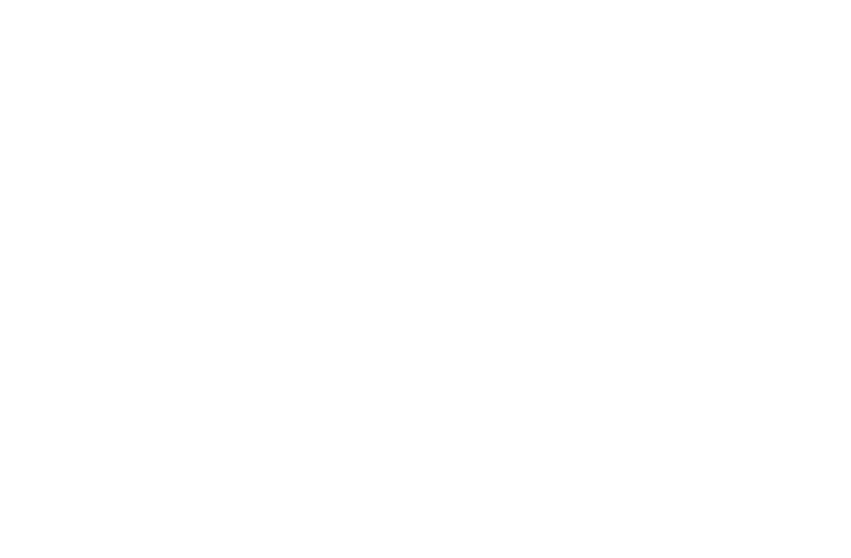

In [208]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,
               feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
               class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
               filled = True,
              rounded = True)